# **Milestone 2**

**Name:** Kamelia Ramandha  
**Batch:** CODA-RMT-010  

This program is developed to perform **descriptive and inferential analysis** on the *Employee Attrition* dataset in order to **identify the factors influencing employees’ decisions to leave the company**.  

Through this analysis, the goal is to generate **insights that help the company reduce attrition rates** and **enhance employee satisfaction and retention**.

**Tableau Dashboard:** 

https://public.tableau.com/views/EmployeeAttritionDashboard_17600242264830/Demography?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Problem Identification

In 2023, **Company A** faced a relatively high rate of employee attrition. This condition led to an increase in overall staff costs due to higher hiring expenses and declining organizational productivity. To address this issue, the CEO assigned the **HR Analytics team** to conduct an in-depth analysis to identify the causes of attrition and understand the demographic profile of employees who decided to leave.

The objective of this project is to **identify the factors influencing employee attrition** and to **map out the characteristics of employees who are more likely to leave** Company A during the year 2023.

More specifically, this analysis aims to answer the following research questions:
1. How is the attrition rate distributed across different departments?  (Chart)
2. Is there any differences in attrition patterns based on gender?  (Chart)
3. Do employees who work overtime tend to have a higher likelihood of attrition compared to those who do not?  (Chart)
4. How is the job level distribution for employee who left?  (Chart)
5. How does the monthly income looks like for employees who left? (Descriptive)
6. Can monthly income predict Attrition? (using Logistic Regression analysis)


## Data Loading

In [99]:
# Importing Library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import ttest_ind

In [100]:
# Loading the employee data
# Weblink: https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction
df = pd.read_csv('HR-Employee-Attrition.csv')

In [101]:
# Checking the data
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [102]:
# Checking the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Cleaning

In [103]:
# Checking the amount of Null data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [104]:
# Checking duplicated data
df.duplicated().sum()

np.int64(0)

In [105]:
# Seeing all the column available
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [106]:
# Dropping the column that won't be used in this analysis
df = df.drop(columns=['BusinessTravel', 'DailyRate', 'Education', 'EducationField', 'EmployeeCount', 'HourlyRate',
       'JobInvolvement', 'DistanceFromHome', 'JobRole', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'EnvironmentSatisfaction',
       'Over18', 'PercentSalaryHike', 
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','TotalWorkingYears'])

df

,Age,Attrition,Department,EmployeeNumber,Gender,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,PerformanceRating,YearsAtCompany
0,41,Yes,Sales,1,Female,2,4,5993,Yes,3,6
1,49,No,Research & Development,2,Male,2,2,5130,No,4,10
2,37,Yes,Research & Development,4,Male,1,3,2090,Yes,3,0
3,33,No,Research & Development,5,Female,1,3,2909,Yes,3,8
4,27,No,Research & Development,7,Male,1,2,3468,No,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2061,Male,2,4,2571,No,3,5
1466,39,No,Research & Development,2062,Male,3,1,9991,No,3,7
1467,27,No,Research & Development,2064,Male,2,2,6142,Yes,4,6
1468,49,No,Sales,2065,Male,2,2,5390,No,3,9


## Data Analysis and Calculation

### Fundamental Information about the Data

In [107]:
df.columns

Index(['Age', 'Attrition', 'Department', 'EmployeeNumber', 'Gender',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'OverTime',
       'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

#### Age

In [108]:
# See the descriptive information about age
max_age_attr = df['Age'].max()
min_age_attr = df['Age'].min()
mode_age_attr = df['Age'].mode()[0]
mean_age_attr = df['Age'].mean().round(2)
std_age_attr = df['Age'].std()

print(f'Max Age: {max_age_attr}')
print(f'Min Age: {min_age_attr}')
print(f'Mode Age: {mode_age_attr}')
print(f'Mean Age: {mean_age_attr}')
print(f'STD Age: {std_age_attr}')


Max Age: 60
Min Age: 18
Mode Age: 35
Mean Age: 36.92
STD Age: 9.135373489136734


The ages of employees range from 18 to 60 years old, with a mean age of 36.9 years and a standard deviation of 9.1 years. The most common age among employees is 35, indicating that most of the workforce consists of mid-career individuals in their 30s and early 40s.

<Axes: ylabel='Frequency'>

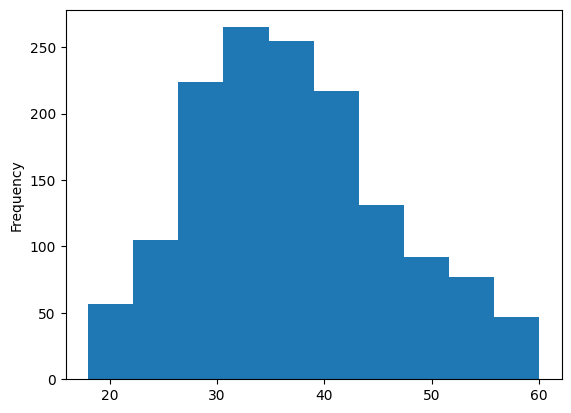

In [109]:
# Create histogram to see Age distribution
df['Age'].plot(kind='hist')

#### Attrition

In [110]:
# See the descriptive information about Attrition
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [111]:
# Count only employee who resigned
emp_resign = df[df['Attrition'] == 'Yes']

# Count total employee
total_emp = df['Attrition'].count()

# Finding attrition rate
attr_rate = (len(emp_resign) / total_emp) * 100


print(f'Total Employee: {(total_emp)}')
print(f'Employee Resigned: {len(emp_resign)}')
print(f'Attrition Rate: {attr_rate:.2f}%')


Total Employee: 1470
Employee Resigned: 237
Attrition Rate: 16.12%


Depending on the industry, 16% is considered normal for an attrition rate.

#### Department

In [112]:
# See the pattern for Department
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

<Axes: xlabel='Department'>

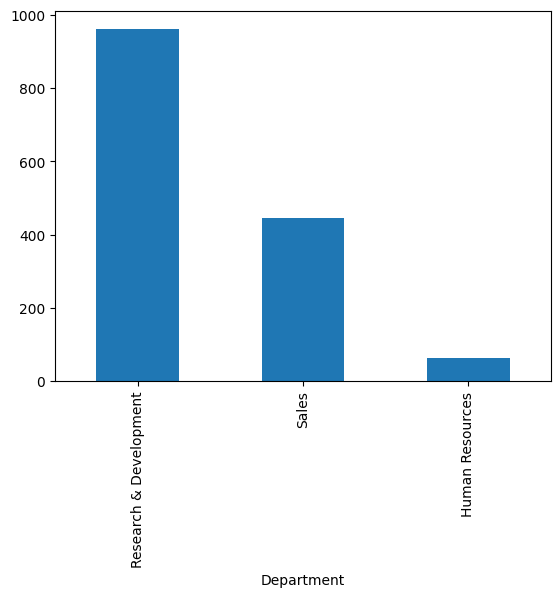

In [113]:
# Create a bar graph to compare no of employee per department
df['Department'].value_counts().plot(kind='bar')

There are a lot of people coming from the Research & Development team (961 employees), while the least employees coming from the Human Resource team (63 employees)

#### Job Level

In [114]:
# See the pattern for Department
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

<Axes: xlabel='JobLevel'>

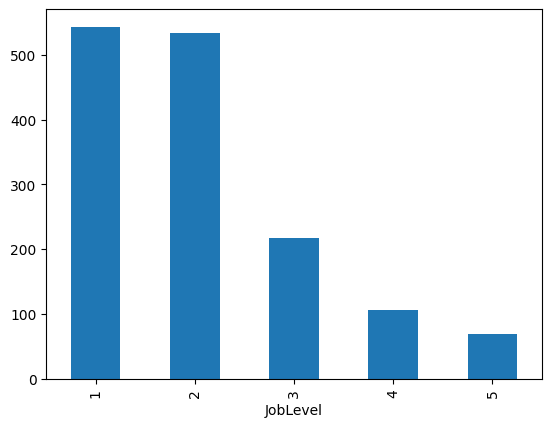

In [ ]:
# Create a bar chart to see the distribution for JobLevel
df['JobLevel'].value_counts().plot(kind='bar')

The majority of employees are in Job Level 1 and 2, with 543 and 534 employees respectively.
The number of employees decreases sharply at higher levels.

This suggests that the organization has a broad base of entry- to mid-level employees and a smaller proportion of senior or managerial positions, which is typical for a hierarchical company structure.

#### Gender

In [ ]:
# See the pattern for Gender distribution
gender_dist = df['Gender'].value_counts()
print(gender_dist)

Gender
Male      882
Female    588
Name: count, dtype: int64


The workforce is composed of 882 male and 588 female employees, indicating a moderate gender imbalance with a higher proportion of male employees in the company.

<Axes: xlabel='Gender'>

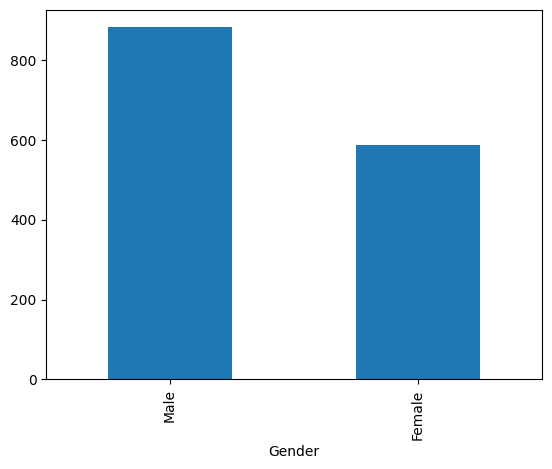

In [ ]:
# Create a bar graph to compare Gender distribution
gender_dist.plot(kind='bar')

#### Job Satisfaction

In [ ]:
# Inspect basic descriptive information for JobSatisfaction
max_sats_attr = df['JobSatisfaction'].max()
min_sats_attr = df['JobSatisfaction'].min()
mode_sats_attr = df['JobSatisfaction'].mode()[0]
mean_sats_attr = df['JobSatisfaction'].mean().round(2)
std_sats_attr = df['JobSatisfaction'].std()

print(f'Max Satisfaction: {max_sats_attr}')
print(f'Min Satisfaction: {min_sats_attr}')
print(f'Mode Satisfaction: {mode_sats_attr}')
print(f'Mean Satisfaction: {mean_sats_attr}')
print(f'STD Satisfaction: {std_sats_attr}')


Max Satisfaction: 4
Min Satisfaction: 1
Mode Satisfaction: 4
Mean Satisfaction: 2.73
STD Satisfaction: 1.1028461230547149


<Axes: ylabel='Frequency'>

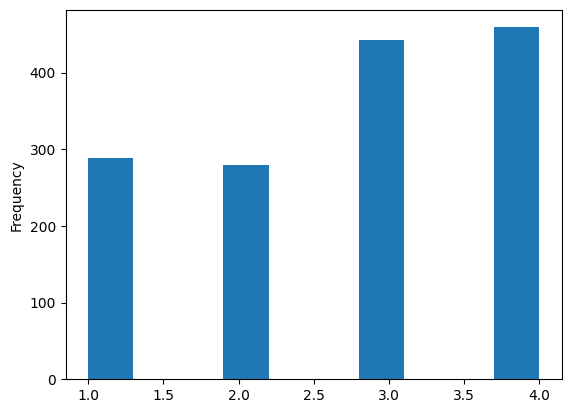

In [ ]:
# Creating histogram chart for job satisfaction to see comparison
df['JobSatisfaction'].plot(kind='hist')

The distribution of job satisfaction levels is fairly balanced, with the majority of employees reporting satisfaction levels of 3 (satisfied) or 4 (very satisfied).

Fewer employees reported low satisfaction levels (1–2), indicating that overall job satisfaction is relatively high in the company, though a small portion of the workforce may still feel disengaged.

#### Monthly Income

In [ ]:
# Inspect basic descriptive information for Monthly Income
max_inco_attr = df['MonthlyIncome'].max()
min_inco_attr = df['MonthlyIncome'].min()
mode_inco_attr = df['MonthlyIncome'].mode()[0]
mean_inco_attr = df['MonthlyIncome'].mean().round(2)
std_inco_attr = df['MonthlyIncome'].std()

print(f'Max Income: {max_inco_attr}')
print(f'Min Income: {min_inco_attr}')
print(f'Mode Income: {mode_inco_attr}')
print(f'Mean Income: {mean_inco_attr}')
print(f'STD Income: {std_inco_attr}')


Max Income: 19999
Min Income: 1009
Mode Income: 2342
Mean Income: 6502.93
STD Income: 4707.956783097995


<Axes: ylabel='Frequency'>

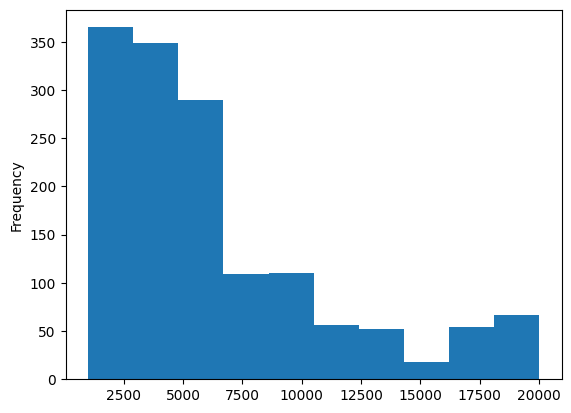

In [ ]:
# Create a histogram chart to see the distribution of Monthly Income
df['MonthlyIncome'].plot(kind='hist')

Employee monthly income ranges from $1,009 to $19,999, with an average of $6,502.93 and a standard deviation of $4,707.96.

The distribution is right-skewed, indicating that most employees earn on the lower end of the income scale, while only a few receive very high salaries. This suggests a wide income gap and potential concentration of high salaries among a smaller group of employees.

#### Overtime

In [ ]:
# Seeing the distribution of OverTime
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

Out of all employees, 1054 do not work overtime, while 416 regularly work overtime.

This indicates that a smaller segment of the workforce bears additional workload, which may potentially contribute to fatigue or higher attrition risk among those employees.

#### Performance Rating

In [ ]:
# Inspect basic descriptive information for Performance Rating
max_perf_attr = df['PerformanceRating'].max()
min_perf_attr = df['PerformanceRating'].min()
mode_perf_attr = df['PerformanceRating'].mode()[0]
mean_perf_attr = df['PerformanceRating'].mean().round(2)
std_perf_attr = df['PerformanceRating'].std()

print(f'Max Performance: {max_perf_attr}')
print(f'Min Performance: {min_perf_attr}')
print(f'Mode Performance: {mode_perf_attr}')
print(f'Mean Performance: {mean_perf_attr}')
print(f'STD Performance: {std_perf_attr}')


Max Performance: 4
Min Performance: 3
Mode Performance: 3
Mean Performance: 3.15
STD Performance: 0.36082352460434486


<Axes: ylabel='Frequency'>

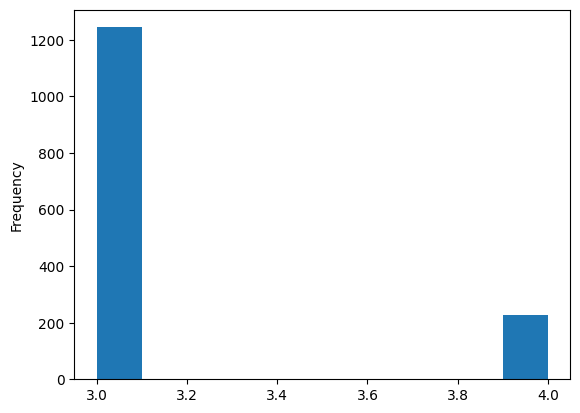

In [ ]:
# Create a histogram chart to see the distribution of performance rating
df['PerformanceRating'].plot(kind='hist')

Employee performance ratings range from 3 to 4, with an average of 3.15. The vast majority of employees received a rating of 3 (Good Performance), while only a small portion achieved 4 (Outstanding Performance).

This limited variation in ratings suggests that the company’s performance evaluation system may be concentrated around average scores, offering limited differentiation between high and moderate performers.

#### Years At Company

In [ ]:
# Inspect basic descriptive information for Years At Company

max_tenure_attr = df['YearsAtCompany'].max()
min_tenure_attr = df['YearsAtCompany'].min()
mode_tenure_attr = df['YearsAtCompany'].mode()[0]
mean_tenure_attr = df['YearsAtCompany'].mean().round(2)
std_tenure_attr = df['YearsAtCompany'].std()

print(f'Max Tenure: {max_tenure_attr}')
print(f'Min Tenure: {min_tenure_attr}')
print(f'Mode Tenure: {mode_tenure_attr}')
print(f'Mean Tenure: {mean_tenure_attr}')
print(f'STD Tenure: {std_tenure_attr}')


Max Tenure: 40
Min Tenure: 0
Mode Tenure: 5
Mean Tenure: 7.01
STD Tenure: 6.126525152403566


<Axes: ylabel='Frequency'>

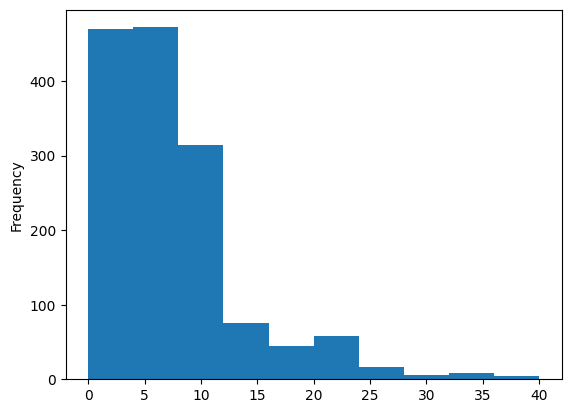

In [ ]:
# Creating a histogram chart for YearsAtCompany to see the distribution
df['YearsAtCompany'].plot(kind='hist')

Employee tenure ranges from 0 to 40 years, with an average of 7.0 years and a mode of 5 years.
The distribution is right-skewed, showing that most employees have less than 10 years of experience in the company.

This suggests that the organization has a relatively new workforce, with fewer long-tenured employees who have stayed beyond 15 years.

### How is the attrition rate distributed across different departments?  

In [ ]:
# Seeing the distribution of no of attrition per department
attr_count_dept = df.groupby('Department')['Attrition'].value_counts()
print(attr_count_dept)


Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: count, dtype: int64


<Axes: xlabel='Department,Attrition'>

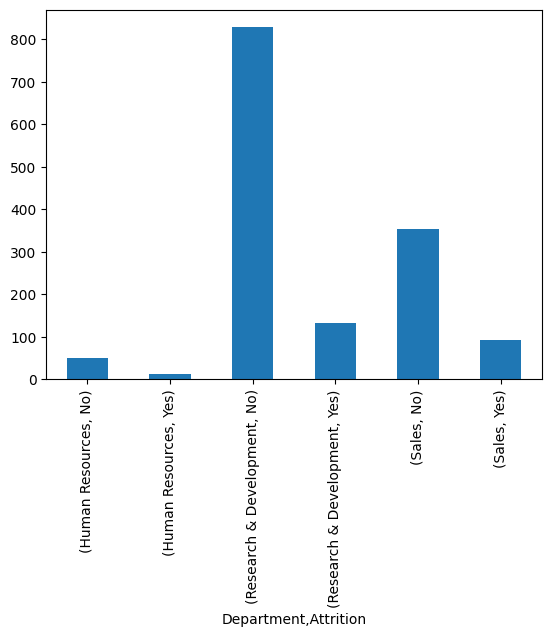

In [ ]:
# Create bar chart to compare the numbers
attr_count_dept.plot(kind='bar')

The Research & Development department has the highest total number of employees and the most attrition cases (133), followed by Sales (92) and Human Resources (12).

While attrition is proportionally lower in HR, the larger workforce in R&D and Sales means those areas experience a higher overall number of resignations, suggesting they may need targeted retention strategies (e.g., workload management, career growth programs, or engagement initiatives).

In [ ]:
# Counting the total employee per department
total_per_dept = df.groupby('Department')['Attrition'].count()

# Counting the total employee who left per department
yes_per_dept = df[df['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count()

# Calculating the attrition rate per department
attr_rate_dept = (yes_per_dept / total_per_dept) * 100
attr_rate_dept = attr_rate_dept.round(2)   # rounding 2 numbers
print(attr_rate_dept)


Department
Human Resources           19.05
Research & Development    13.84
Sales                     20.63
Name: Attrition, dtype: float64


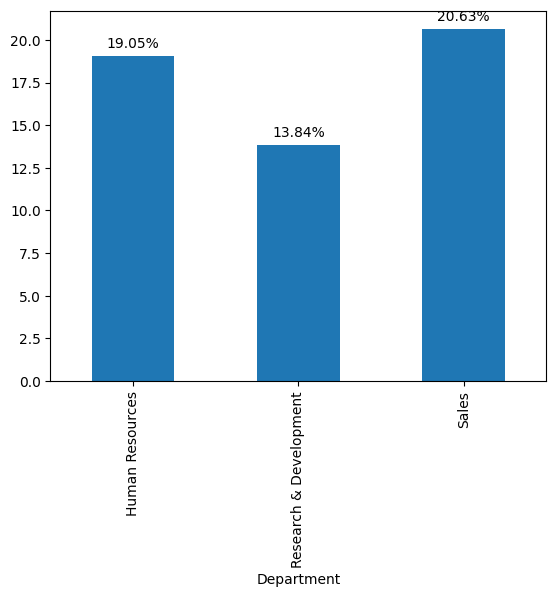

In [ ]:
# Visualizing the attrition rate per department
attr_rate_dept.plot(kind='bar')
for index, value in enumerate(attr_rate_dept):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

The Sales Department has the highest attrition rate at 20.63%, followed by Human Resources (19.05%), and Research & Development (13.84%).

This indicates that Sales team is more likely to leave compared to other departments. The higher turnover in Sales could be linked to job pressure, performance-based incentives, or external career opportunities. On the other hand, the lower attrition in R&D suggests better retention and job stability among technical staff.

### Is there any differences in attrition patterns based on gender?  

In [ ]:
# Analyzing the distribution of Gender
df[df['Attrition'] == 'Yes']['Gender'].value_counts()

Gender
Male      150
Female     87
Name: count, dtype: int64

While the number of male employees who left the company is higher than that of female employees, this difference alone does not necessarily indicate a significant relationship between gender and attrition.
To determine whether gender truly influences attrition, a statistical test such as the Chi-Square Test of Independence is required to assess whether the difference is statistically significant or simply due to chance.

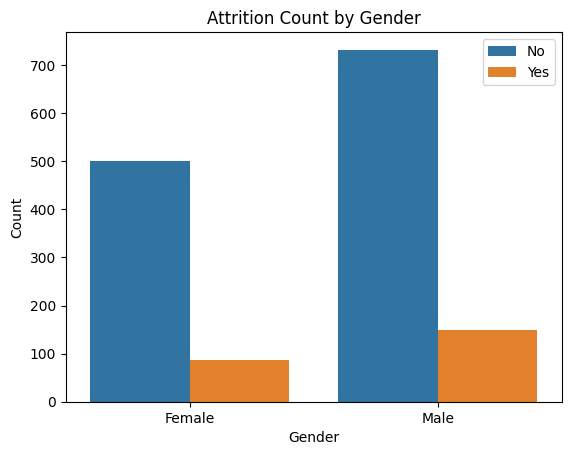

In [49]:
# Count how many Yes/No attrition per gender
gender_attr = df.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')

# Plot
sns.barplot(data=gender_attr, x='Gender', y='Count', hue='Attrition')
plt.title("Attrition Count by Gender")
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [50]:
# Preparing contingency table for Chi-Square Analysis
contingency_table = pd.crosstab(df['Attrition'],df['Gender'])
contingency_table

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [51]:
# Doing the Chi-Square Analysis
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.29057244902890855


Since the p-value (0.29) > 0.05, there is no statistically significant relationship between Gender and Attrition. Thus, we can't dismiss H0.

Although the raw numbers show that more male employees left compared to females, the difference is not large enough to conclude that gender affects attrition.

In other words, attrition appears to be gender-neutral in this dataset.

### Do employees who work overtime tend to have a higher likelihood of attrition compared to those who do not?  

In [ ]:
# Analyzing the distribution of OverTime and Attrition
attr_count = df.groupby('OverTime')['Attrition'].value_counts()
print(attr_count)


OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: count, dtype: int64


<Axes: xlabel='OverTime,Attrition'>

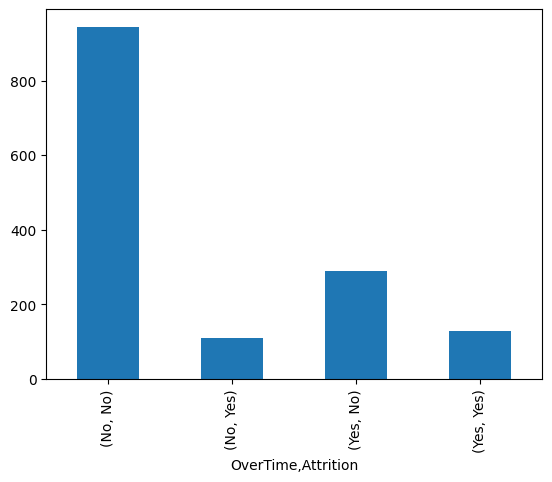

In [ ]:
#Create a bar chart to see the distribution
attr_count.plot(kind='bar')

From the chart, we can observe that some employees who left the company worked overtime, while others did not. However, this visual alone does not provide enough information to determine whether overtime is actually related to attrition.

To explore this relationship more accurately, we can perform a Chi-Square Test of Independence, which is suitable for assessing the association between two categorical variables — in this case, OverTime and Attrition.

In [ ]:
# Create a contingency table to see the statistical comparison for Attrition and Overtime
contingency_table = pd.crosstab(df['Attrition'],df['OverTime'])
contingency_table

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


In [ ]:
# Finding the p-value for Chi-Square analysis
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 8.15842372153832e-21


Since the p-value (8.16e-21) is much smaller than 0.05, we can conclude that there is a statistically significant relationship between OverTime and Attrition.

Employees who work overtime are significantly more likely to leave the company than those who do not.
This suggests that workload and work-life balance could be key factors driving attrition within the organization.

### How is the job level distribution for employee who left?  (Chart)

In [120]:
# Analyze the distribution for Attrition per level
attr_joblevel = df[df['Attrition'] == 'Yes']['JobLevel'].value_counts()

print(attr_joblevel)



JobLevel
1    143
2     52
3     32
5      5
4      5
Name: count, dtype: int64


<Axes: xlabel='JobLevel'>

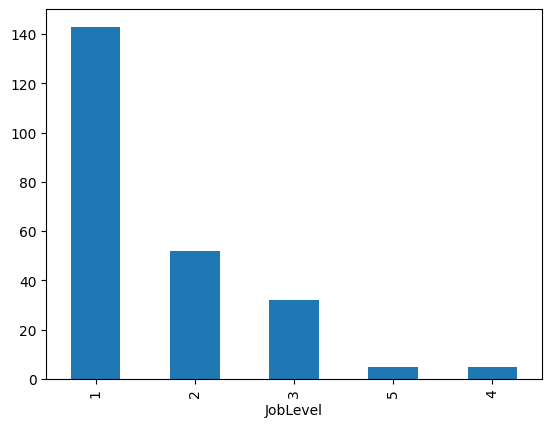

In [121]:
# Creating a bar chart to see the JobLevel distribution between people who left
attr_joblevel.plot(kind='bar')

We can see that most employees who left the company are entry-level employees (Job Level 1), followed by those in Job Level 2.  
Attrition drops sharply in higher job levels, with only a small number of departures among senior and managerial employees (Levels 4 and 5).  

This pattern is common across organizations, early-career employees tend to have higher turnover rates due to career exploration, lower pay, or a search for better opportunities.  

### How does the monthly income distribution for people who left?

In [ ]:
# Analyzing the descriptive aspect of Monthly Income
left_mean_salary = df[df['Attrition'] == "Yes"]['MonthlyIncome'].mean().round(2)
left_mode_salary = df[df['Attrition'] == "Yes"]['MonthlyIncome'].mode().values[0]
left_median_salary = df[df['Attrition'] == "Yes"]['MonthlyIncome'].median()
left_std_salary = df[df['Attrition'] == "Yes"]['MonthlyIncome'].std()

print(f'Mean Salary: {left_mean_salary}')
print(f'Mode Salary: {left_mode_salary}')
print(f'Median Salary: {left_median_salary}')
print(f'STD Salary: {left_std_salary}')

Mean Salary: 4787.09
Mode Salary: 2293
Median Salary: 3202.0
STD Salary: 3640.2103671038512


Among employees who left the company, the average monthly salary was $4,787, with a median of $3,202 and a mode of $2,293.
The standard deviation of $3,640 indicates a wide variation in income levels, suggesting that attrition occurred across different salary ranges.

<Axes: ylabel='Frequency'>

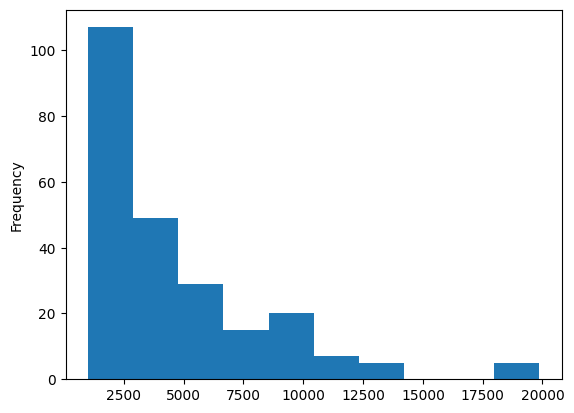

In [ ]:
# Creating a histogram chart to see the distribution of Monthly Income for people who left
df[df['Attrition'] == "Yes"]['MonthlyIncome'].plot(kind='hist')

<Axes: >

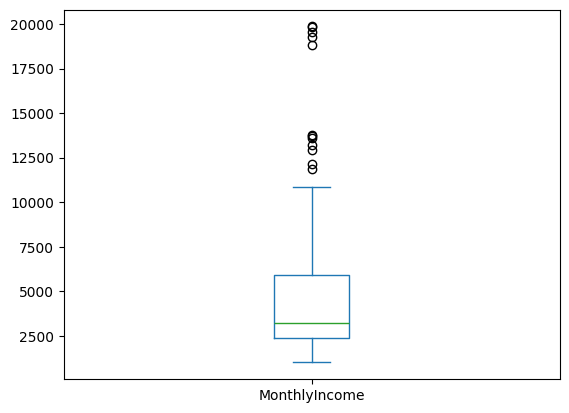

In [124]:
# Generating the box plot for the distribution
df[df['Attrition'] == 'Yes']["MonthlyIncome"].plot(kind='box')

In [125]:
# Normality Test using D'Agostino K^2 Test
res = stats.shapiro(df[df['Attrition'] == 'Yes']["MonthlyIncome"])
print(f'p-value: {res.pvalue}')

# Analyzing the Skewness and Kurtosis level
print(f"Skewness: {df[df['Attrition'] == 'Yes']["MonthlyIncome"].skew()}")
print(f"Kurtosis: {df[df['Attrition'] == 'Yes']["MonthlyIncome"].kurtosis()}")

p-value: 1.5025414983521112e-17
Skewness: 1.9211469079285477
Kurtosis: 4.181844867188367


The very small p-value (< 0.05) indicates that the data significantly deviates from a normal distribution.

The positive skewness (1.92) suggests that the distribution is right-skewed, meaning most employees who left earned below the average, while a few earned much higher salaries.

The kurtosis value (4.18), which is higher than 3, shows that the distribution is leptokurtic, which means having a sharper peak and heavier tails than a normal curve.

In simpler terms, most employees who left the company had relatively low salaries, but there are a few high-income outliers pulling the average upward.

### Can Monthly Income predict Attrition? (using Logistic Regression analysis)


In [126]:
import statsmodels.api as sm

# Encode Attrition to numeric
df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Add constant
X = sm.add_constant(df['MonthlyIncome'])
y = df['Attrition_num']

# Fit logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.426223
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Attrition_num   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Oct 2025   Pseudo R-squ.:                 0.03503
Time:                        09:22:34   Log-Likelihood:                -626.55
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.537e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9291      0.129     -7.191      0.000      -1.182      -0.676
MonthlyIncome    -0.

The logistic regression analysis indicates that Monthly Income significantly predicts Attrition (p < 0.001).
The negative coefficient (-0.0001) means that as an employee’s monthly income increases, the likelihood of leaving the company decreases.

In other words, employees with lower salaries are more likely to resign, highlighting the potential impact of compensation and financial satisfaction on retention.

Optimization terminated successfully.
         Current function value: 0.426223
         Iterations 7


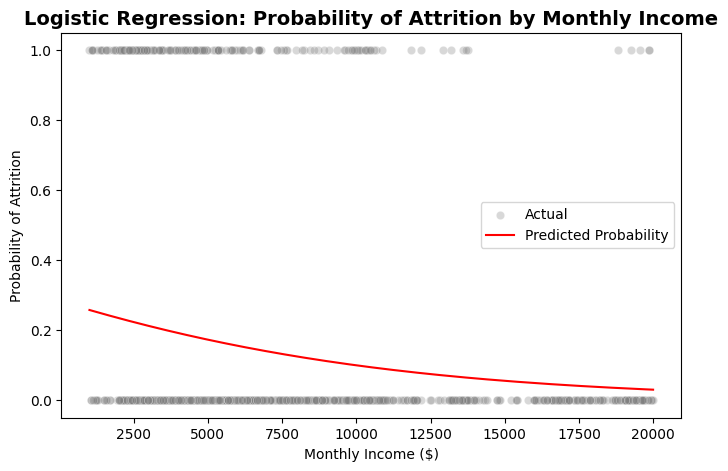

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Prepare the data
df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Fit the logistic model
X = sm.add_constant(df['MonthlyIncome'])
y = df['Attrition_num']
model = sm.Logit(y, X).fit()

# Predict probabilities
df['Predicted_Prob'] = model.predict(X)

# Plot the logistic regression curve
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='MonthlyIncome', y='Attrition_num', alpha=0.3, color='gray', label='Actual')
sns.lineplot(data=df.sort_values('MonthlyIncome'), x='MonthlyIncome', y='Predicted_Prob', color='red', label='Predicted Probability')

plt.title('Logistic Regression: Probability of Attrition by Monthly Income', fontsize=14, weight='bold')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Probability of Attrition')
plt.legend()
plt.show()


## **Summary**

Based on the analysis, several key factors were identified as contributors to employee attrition within the company. The Sales Department shows the highest attrition rate (20.63%), followed by Human Resources (19.05%) and Research & Development (13.84%). This suggests that Sales employees are more vulnerable to leaving, potentially due to high performance pressure, demanding targets, or better external career opportunities.

The Chi-Square Test found no significant relationship between Gender and Attrition (p = 0.29), indicating that attrition is gender-neutral. However, a significant relationship was found between OverTime and Attrition (p = 8.16e-21), suggesting that employees who frequently work overtime are more likely to leave. This highlights the need for the company to promote a healthier work–life balance and review overtime policies.

In terms of Job Level, most employees who resigned were from entry-level positions (Levels 1 and 2). This is consistent with typical turnover patterns where early-career employees seek higher pay, career advancement, or skill development.

The analysis of Monthly Income shows that the salary distribution among employees who left is non-normal (p < 0.05), with most earning below the average. Logistic regression further confirms that income significantly predicts attrition (p < 0.001), which indicates employees with higher salaries are less likely to leave.

Overall, the results indicate that compensation, workload, and career progression are the main drivers of attrition. To improve employee retention, the company is advised to:

1. Review and adjust the salary structure to remain competitive in the market.
2. Enhance career development opportunities, especially for entry-level employees.
3. Promote work–life balance by optimizing overtime and workload management.

Implementing these strategies will help the company reduce turnover, increase employee satisfaction, and build a more sustainable workforce.